## K-means for compression
In this problem, we will apply the **K-means** algorithm to lossy image compression, by reducing the number of colors used in an image.
1. The _mandrill-large.tiff_ file:
It contains a 512*512 image of a mandrill represented in 24-bit color. (262144 pixels in the image);
2. The _mandrill-small.tiff_ file:
It contains a 128*128 image of a mandrill represented in 24-bit color. (16384 pixels in the image).

The mandrill-large.tiff array shape:  (512, 512, 3)
[[[164 150  71]
  [ 63  57  31]
  [ 75  43  10]
  ..., 
  [117 119  68]
  [141 170 101]
  [179 188 118]]

 [[120 125  62]
  [135  97  33]
  [ 55  35  23]
  ..., 
  [122 140  98]
  [136 159 128]
  [120 138  74]]

 [[ 99  74  31]
  [132 118  46]
  [ 60  41  36]
  ..., 
  [118  93  90]
  [ 87  91  77]
  [ 96  80  49]]

 ..., 
 [[121 148 155]
  [123 156 150]
  [124 150 139]
  ..., 
  [110  73  60]
  [ 90  93  70]
  [ 81  80  60]]

 [[126 169 168]
  [117 151 151]
  [121 136 133]
  ..., 
  [ 73  84  68]
  [ 99  69  86]
  [ 80  63  71]]

 [[  9  11  12]
  [ 10  12  11]
  [ 11  15  12]
  ..., 
  [  5   8   5]
  [  2   5   0]
  [  4   5   2]]]


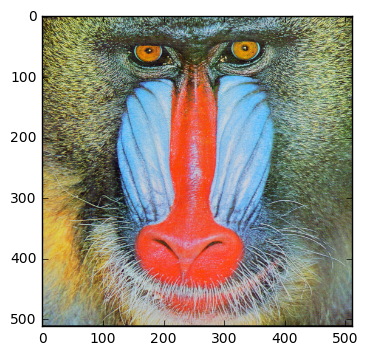

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.spatial.distance import pdist # not used!!!

# im_image is a "three dimensional matrix"
# im_image[:, :, 0], im_image[:, :, 1] and im_image[:, :, 2] are 512*512 arrays that
# respectively contain the red, green, and blue values for each pixel.
# large picture
im_large = imread('mandrill-large.tiff')
print("The mandrill-large.tiff array shape: ", im_large.shape)
print(im_large)
plt.imshow(im_large)

The mandrill-small.tiff array shape:  (128, 128, 3)
[[[110  94  42]
  [ 95  80  40]
  [ 79  68  40]
  ..., 
  [ 89  83  58]
  [116 115  70]
  [116 119  79]]

 [[109  98  41]
  [ 91  82  42]
  [ 79  75  44]
  ..., 
  [108 115  70]
  [103 109  70]
  [ 91  92  59]]

 [[ 64  44  30]
  [115 105  47]
  [103  93  48]
  ..., 
  [118 125  80]
  [ 98 100  64]
  [111 111  62]]

 ..., 
 [[134 159 158]
  [120 144 143]
  [123 144 149]
  ..., 
  [ 90  88  77]
  [ 92  91  86]
  [ 84  82  75]]

 [[112 129 128]
  [124 147 149]
  [119 145 161]
  ..., 
  [ 90  90  87]
  [ 93 102  96]
  [ 93  91  84]]

 [[109 133 135]
  [118 140 138]
  [112 134 148]
  ..., 
  [ 85  76  66]
  [ 83  79  73]
  [ 92  92  85]]]


49152

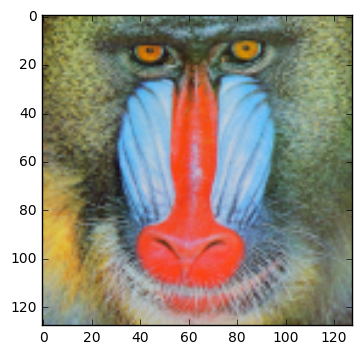

In [19]:
# Small picture
im_small = imread('mandrill-small.tiff')
print("The mandrill-small.tiff array shape: ", im_small.shape)
print(im_small)
plt.imshow(im_small)

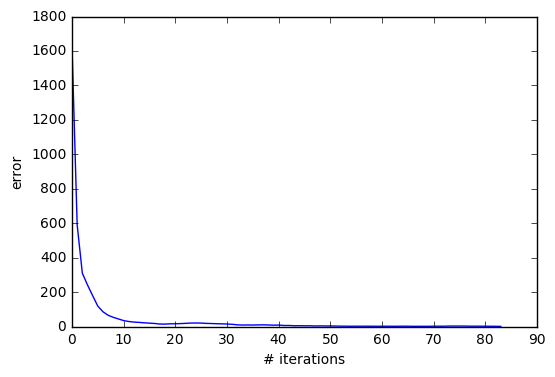

In [23]:
# Run K-means with 16 clusters on the pixel data from this smaller image
X = im_small.reshape(-1, 3)   # 3 dimensional reshape to 2 dimensional
X.shape

# implement K-means
def kmean(X, num_clusters=16):
    # picking random data points from the data as the initial centroids to avoid empty cluster
    _idxes = np.random.choice(X.shape[0], size=num_clusters, replace=False)
    centroids = X[_idxes]
    
    err_history = []
    err = 1e6 # 10*10*10*10*10*10
    while err > 1:
        dists_list = []
        for c in centroids:
            ds = np.sqrt(np.sum((X - c) ** 2, axis=1))
            dists_list.append(ds)
            
        assign = np.stack(dists_list).argmin(axis=0)
        
        # new centroids
        nc_list = []
        for k in range(num_clusters):
            nc_list.append(X[np.where(assign == k)[0]].mean(axis=0))
            
        nc = np.stack(nc_list)
        err = np.sum(np.abs(nc - centroids)) # K-means error
        err_history.append(err)
        centroids = nc
    return centroids, assign, err_history

centroids, _, err_history = kmean(X, 16)
plt.plot(err_history)
plt.xlabel('# iterations')
plt.ylabel('error')

Take the matrix im_large from _mandrill-large.tiff_, and replace each pixel's (r, g, b) values with the values of the closest cluster centroid. Display the new image, and compare it visually to the original image.

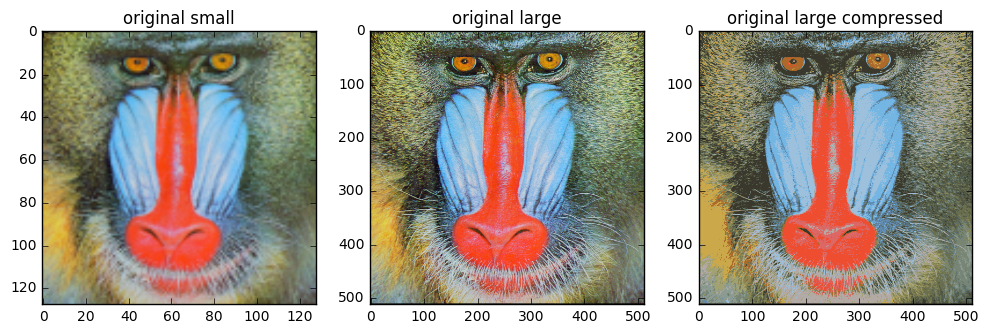

In [27]:
dists_list = []
num_clusters = 16
dim = im_large.shape[0]
X_large = im_large.reshape(-1, 3)
for c in centroids:
    ds = np.sqrt(np.sum((X_large - c) ** 2, axis=1))
    dists_list.append(ds)
assign = np.stack(dists_list).argmin(axis=0)  # argmin: Returns the indices of the minimum values along an axis
compressed = np.zeros_like(X_large)  # zeros_like: return an array of zeros with the same shape and type as a given array
for k in range(num_clusters):
    idxes = np.where(assign == k)[0]
    compressed[idxes] = centroids[k]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax0, ax1, ax2 = axes.ravel()

ax0.imshow(im_small)
ax0.set_title('original small')

ax1.imshow(im_large)
ax1.set_title('original large')

ax2.imshow(compressed.reshape(dim, dim, 3))
ax2.set_title('original large compressed')